In [49]:
#carga del dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

df_hrdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Documents/HRDataset_v14.csv', sep=',', header=[0], parse_dates=True)
df_hrdata.index = df_hrdata['EmpID']
df_hrdata = df_hrdata.drop('EmpID', axis='columns')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
#Estadisticas descriptivas basicas

print('Median of absences: ', df_hrdata['Absences'].median())
print('Marital status:\n ', df_hrdata.groupby(['MaritalDesc','Sex']).size())
print('Race and gender distribution:\n ', df_hrdata.groupby(['RaceDesc','Sex']).size())
print('Most commmon race description: ', df_hrdata['RaceDesc'].value_counts().idxmax())
print('Most common gender: ', df_hrdata['Sex'].value_counts().idxmax())

print(df_hrdata.info())

Median of absences:  10.0
Marital status:
  MaritalDesc  Sex
Divorced     F      16
             M      14
Married      F      72
             M      52
Separated    F       9
             M       3
Single       F      75
             M      62
Widowed      F       4
             M       4
dtype: int64
Race and gender distribution:
  RaceDesc                          Sex
American Indian or Alaska Native  F        2
                                  M        1
Asian                             F       17
                                  M       12
Black or African American         F       47
                                  M       33
Hispanic                          M        1
Two or more races                 F        6
                                  M        5
White                             F      104
                                  M       83
dtype: int64
Most commmon race description:  White
Most common gender:  F
<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 ent

Text(0, 0.5, 'Amount of employees')

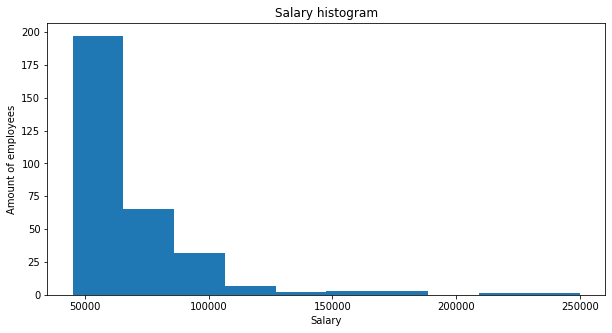

In [33]:
#Histograma de salarios, rangos más populares

fig, a1 = plt.subplots(figsize=(10, 5))
a1.hist(df_hrdata['Salary'], bins=10) 
a1.set_title('Salary histogram') 
a1.set_xlabel('Salary') 
a1.set_ylabel('Amount of employees') 

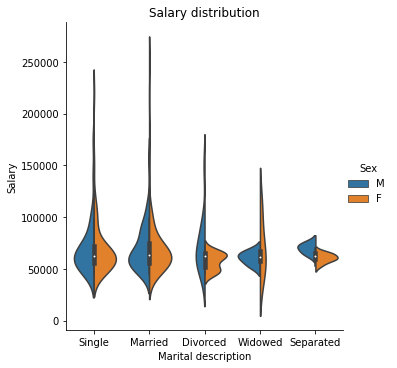

In [32]:
#Gráfico de violín de salarios, discriminados por género

a2 = sns.catplot(data=df_hrdata, kind='violin', x='MaritalDesc', y='Salary', hue='Sex', split=True) 
a2.set(xlabel='Marital description', ylabel='Salary', title='Salary distribution') 

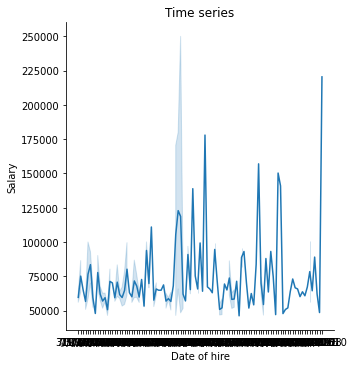

In [40]:
#Gráfico de serie de tiempo correspondiente a la fecha de contratación
a3 = sns.relplot(data=df_hrdata, kind='line', x='DateofHire', y='Salary')
a3.set(xlabel='Date of hire', ylabel='Salary', title='Time series graph')